<a href="https://colab.research.google.com/github/dohyeonkim2526/AI-project/blob/main/Practice_1127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **주제**: 지역에 따른 매출액 증감률을 분석하여 아파트 시가의 성장성 예측

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 아파트 일반정보 및 시세 데이터

In [2]:
data_apt='/content/gdrive/My Drive/인공지능융합프로젝트/기웅/아파트 일반정보 및 시세.xlsx'

In [3]:
import pandas as pd
data_apt=pd.read_excel(data_apt)

In [4]:
data_apt['매매지역명'].unique()

array(['강원도', '서울특별시', '대구광역시'], dtype=object)

In [5]:
data_apt['매매지역명'].groupby(data_apt['매매지역명']).count()

매매지역명
강원도      14672
대구광역시    40362
서울특별시     1215
Name: 매매지역명, dtype: int64



*   대구광역시에 대한 데이터가 대부분이므로 대구광역시에 대해서만 예측을 진행




In [6]:
new_apt=data_apt[data_apt['매매지역명']=='대구광역시']
new_apt=new_apt.reset_index(drop=True)

In [7]:
new_apt=new_apt.sort_values(by=['아파트명','아파트면적값'])
new_apt[:10]

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,최근전세실거래가격,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자
1200,201904,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,78000000,20180721,45000000,20180428,70000000,76000000,82000000,40000000,45000000,50000000,20190408
3796,201905,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,86700000,20190416,45000000,20180428,70000000,77000000,84000000,40000000,45000000,50000000,20190520
5161,201904,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,86700000,20190416,45000000,20180428,70000000,76000000,82000000,40000000,45000000,50000000,20190422
8188,201905,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,86700000,20190416,45000000,20180428,70000000,77000000,84000000,40000000,45000000,50000000,20190513
9794,201905,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,86700000,20190416,45000000,20180428,70000000,77500000,85000000,40000000,45000000,50000000,20190527
12119,201904,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,78000000,20180721,45000000,20180428,70000000,76000000,82000000,40000000,45000000,50000000,20190401
14464,201904,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,78000000,20180721,45000000,20180428,70000000,76000000,82000000,40000000,45000000,50000000,20190415
16868,201904,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,86700000,20190416,45000000,20180428,70000000,76000000,82000000,40000000,45000000,50000000,20190429
19048,201905,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,86700000,20190416,45000000,20180428,70000000,76000000,82000000,40000000,45000000,50000000,20190506
21453,202004,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,70000000,20191017,30000000,20191229,78000000,82000000,86000000,40000000,45000000,50000000,20200406


In [8]:
new_apt.shape

(40362, 19)

In [9]:
#new_apt=new_apt.sort_values(by=['아파트명','기준년월','시세기준일자'])
#new_apt[:10]

## 지번범위


In [111]:
zip_data='/content/gdrive/My Drive/인공지능융합프로젝트/지번범위.txt'

In [112]:
zip_data=pd.read_csv(zip_data, sep="|", header=0)

In [113]:
zip_data

,우편번호,시도,시도영문,시군구,시군구영문,읍면동,읍면동영문,리명,산여부,행정동,시작주번지,시작부번지,끝주번지,끝부번지
0,25627,강원도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,모전리,0,NaN,2,3,880.0,0.0
1,25627,강원도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,모전리,1,NaN,26,3,240.0,0.0
2,25630,강원도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,산성우리,1,NaN,3,1,321.0,0.0
3,25630,강원도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,산성우리,0,NaN,24,2,390.0,1.0
4,25620,강원도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,상시동리,0,NaN,1,0,876.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253068,27481,충청북도,Chungcheongbuk-do,충주시,Chungju-si,호암동,Hoam-dong,NaN,0,NaN,905,0,NaN,NaN
253069,27482,충청북도,Chungcheongbuk-do,충주시,Chungju-si,호암동,Hoam-dong,NaN,0,NaN,906,0,NaN,NaN
253070,27477,충청북도,Chungcheongbuk-do,충주시,Chungju-si,호암동,Hoam-dong,NaN,0,NaN,967,0,NaN,NaN
253071,27502,충청북도,Chungcheongbuk-do,충주시,Chungju-si,호암동,Hoam-dong,NaN,0,NaN,974,0,1052.0,0.0


In [114]:
zip_data=zip_data[zip_data['시도']=='대구광역시']
zip_data

,우편번호,시도,시도영문,시군구,시군구영문,읍면동,읍면동영문,리명,산여부,행정동,시작주번지,시작부번지,끝주번지,끝부번지
105292,42424,대구광역시,Daegu,남구,Nam-gu,대명동,Daemyeong-dong,NaN,0,NaN,2,6,2.0,32.0
105293,42426,대구광역시,Daegu,남구,Nam-gu,대명동,Daemyeong-dong,NaN,0,NaN,3,5,4.0,1.0
105294,42425,대구광역시,Daegu,남구,Nam-gu,대명동,Daemyeong-dong,NaN,0,NaN,4,4,5.0,26.0
105295,42426,대구광역시,Daegu,남구,Nam-gu,대명동,Daemyeong-dong,NaN,0,NaN,6,1,NaN,NaN
105296,42428,대구광역시,Daegu,남구,Nam-gu,대명동,Daemyeong-dong,NaN,0,NaN,7,3,9.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115022,41919,대구광역시,Daegu,중구,Jung-gu,하서동,Haseo-dong,NaN,0,NaN,29,2,31.0,2.0
115023,41934,대구광역시,Daegu,중구,Jung-gu,하서동,Haseo-dong,NaN,0,NaN,34,2,34.0,3.0
115024,41918,대구광역시,Daegu,중구,Jung-gu,향촌동,Hyangchon-dong,NaN,0,NaN,2,7,75.0,2.0
115025,41909,대구광역시,Daegu,중구,Jung-gu,화전동,Hwajeon-dong,NaN,0,NaN,2,1,45.0,1.0


In [14]:
zip_data.duplicated(['우편번호'])

105292    False
105293    False
105294    False
105295     True
105296    False
          ...  
115022     True
115023     True
115024     True
115025     True
115026     True
Length: 9735, dtype: bool

In [115]:
zip=zip_data[['우편번호','읍면동']]

In [116]:
zip

,우편번호,읍면동
105292,42424,대명동
105293,42426,대명동
105294,42425,대명동
105295,42426,대명동
105296,42428,대명동
...,...,...
115022,41919,하서동
115023,41934,하서동
115024,41918,향촌동
115025,41909,화전동




*   그런데 같은 우편번호에 대해서 '읍면동'이 다른 경우가 존재한다.



In [17]:
#zip.to_excel('/content/gdrive/My Drive/인공지능융합프로젝트/zip.xlsx')

In [117]:
zip=zip.drop_duplicates(['우편번호'], keep="first")

In [220]:
#zip.to_excel('/content/gdrive/My Drive/인공지능융합프로젝트/zip_daegu.xlsx')



*   우편 번호가 겹치는 경우가 몇몇개 존재하는데, 우선 "first" 데이터로 지정하고 중복 데이터를 제거해준다.
*   해당 경우에 대해서 어떻게 처리할지 다시 고민해보기!!



In [19]:
#zip code와 데이터 합치기
new_apt=pd.merge(new_apt, zip, on='우편번호') #수정하고 new_apt로 합치면 된다.
#new_apt2



*   같은 우편번호에 대해서 '읍면동' 다른 경우에 대해서 해결하고 아래의 sort_apt에 (new_apt) 이름으로 데이터프레임 넣기!!



## 도로명범위

In [20]:
#road_data='/content/gdrive/My Drive/인공지능융합프로젝트/도로명범위.txt'

In [21]:
#road_data=pd.read_csv(road_data, sep="|", header=0)

In [22]:
#road_data=road_data[road_data['시도']=='대구광역시']

In [23]:
#road_data

In [24]:
#road_data.duplicated(['우편번호'])

## **증감비율 계산**
*   (A평 거래건수 x A평 매매가 증감률 + B평 거래건수 X B평 매매가 증감률) / (A평 거래건수 + B평 거래건수)




1.   (개별 아파트 기준) 아파트 면적값당 총 거래건수 구하기 : 201904~202005
2.   (개별 아파트 기준) 아파트 면적값당 매매일반평균가격 증감비율 계산 : 201904~202005







## 1. 아파트 면적값당 총 거래건수 구하기


*   시세기준일자( 20190401,  20190408,  20190415, ...,  20200511,  20200518)

*   각 년도의 동일 아파트명, 아파트세대수를 기준으로 매매 증감률을 보기 위해 시세 기준일자의 처음과 마지막을 고려할 것
*   ex. 73신암시영 >> 49.55평 >> 20190401 & 20200518 비교하여서 증감률 파악



In [25]:
num_apt=new_apt['시세기준일자'].groupby([new_apt['아파트명'],new_apt['아파트면적값']]).count()
num_apt=pd.DataFrame(num_apt)

In [26]:
num_apt.index.rename(['아파트명','아파트면적값'], inplace=True)

In [27]:
num_apt.reset_index(inplace=True)

In [28]:
num_apt['아파트면적값']=num_apt['아파트면적값']*0.3025

In [29]:
num_apt=num_apt.rename(columns={'시세기준일자':'거래건수'})
num_apt

,아파트명,아파트면적값,거래건수
0,73신암시영,11.440550,17
1,73신암시영,14.988875,17
2,KOASIS,39.802950,17
3,KOASIS,44.149875,17
4,KOASIS,64.919525,17
...,...,...,...
2372,희망교대성유니드,37.718725,17
2373,희망교대성유니드,42.168500,8
2374,힐스테이트황금동,18.140925,17
2375,힐스테이트황금동,25.685275,17


## 2. 아파트 면적값당 매매일반평균가격 증감비율 계산 

In [30]:
#sort_apt=pd.concat([new_apt.drop_duplicates(['기준년월','아파트명','아파트면적값'],keep='first'), new_apt.drop_duplicates(['기준년월','아파트명','아파트면적값'],keep='last')], axis=0)
sort_apt=pd.concat([new_apt.drop_duplicates(['아파트명','아파트면적값'],keep='first'), new_apt.drop_duplicates(['아파트명','아파트면적값'],keep='last')], axis=0)
sort_apt=sort_apt.sort_values(by=['아파트명','아파트면적값'])

In [31]:
sort_apt=sort_apt.reset_index(drop=True)
sort_apt

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,최근전세실거래가격,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,읍면동
0,201904,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,78000000,20180721,45000000,20180428,70000000,76000000,82000000,40000000,45000000,50000000,20190408,신암동
1,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,70000000,20191017,30000000,20191229,78000000,82000000,86000000,40000000,45000000,50000000,20200518,신암동
2,201904,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,94,3,49.55,85000000,20181101,45000000,20180430,80000000,87500000,95000000,50000000,55000000,60000000,20190408,신암동
3,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,94,3,49.55,105000000,20200311,60000000,20191114,84000000,94500000,105000000,50000000,55000000,60000000,20200518,신암동
4,201904,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,42,1,131.58,520000000,20181226,340000000,20190113,420000000,470000000,520000000,280000000,310000000,340000000,20190408,황금동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,155,8,59.97,550000000,20200131,340000000,20200512,540000000,570000000,600000000,345000000,362500000,380000000,20200518,황금동
4750,201904,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,316,8,84.91,773000000,20180918,450000000,20190122,720000000,785000000,850000000,380000000,415000000,450000000,20190408,황금동
4751,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,316,8,84.91,700000000,20200221,420000000,20200513,735000000,785000000,835000000,400000000,430000000,460000000,20200518,황금동
4752,201904,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,245,8,84.93,710000000,20180820,480000000,20190309,700000000,765000000,830000000,380000000,405000000,430000000,20190408,황금동


In [32]:
#sort_apt.to_excel('/content/gdrive/My Drive/인공지능융합프로젝트/sort.xlsx')

In [33]:
#sort_apt['매매일반평균가격'].groupby([sort_apt['아파트명'], sort_apt['아파트면적값']]).sum()

In [34]:
rates=[]

for i in range(0, sort_apt.shape[0], 2):
  row=sort_apt.iloc[i]
  before=row['매매일반평균가격']
  
  j=i+1
  new_row=sort_apt.iloc[j]
  after=new_row['매매일반평균가격']
  
  rate=round(after/before,2)
  rates.append(rate)
  i+=2

  if i == sort_apt.shape[0]:
    break

In [35]:
SORT=sort_apt.drop_duplicates(['아파트명','아파트면적값'], keep='last')




*   1(m^2) = 약 0.3025평
*   (column) **아파트면적값** => 평수로 계산하기 위해서 0.3025를 곱해준다.


In [36]:
SORT['아파트면적값']=SORT['아파트면적값']*0.3025

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
#전년도대비증감비율(2019년4월~2020년5월)
SORT['증감비율']=rates

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  




*   (column) **증감비율**: 전년도대비 '매매일반평균가격'의 증감비율을 구한 것



In [38]:
SORT

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,최근전세실거래가격,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,읍면동,증감비율
1,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,11.440550,70000000,20191017,30000000,20191229,78000000,82000000,86000000,40000000,45000000,50000000,20200518,신암동,1.08
3,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,94,3,14.988875,105000000,20200311,60000000,20191114,84000000,94500000,105000000,50000000,55000000,60000000,20200518,신암동,1.08
5,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,42,1,39.802950,515000000,20191227,360000000,20190823,490000000,517500000,545000000,295000000,315000000,335000000,20200518,황금동,1.10
7,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,42,1,44.149875,385000000,20181101,360000000,20190524,550000000,580000000,610000000,345000000,370000000,395000000,20200518,황금동,1.26
9,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,21,1,64.919525,680000000,20190823,535000000,20161214,650000000,700000000,750000000,460000000,485000000,510000000,20200518,황금동,1.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,202005,대구광역시,42437,희망교대성유니드,대구광역시 남구 희망로5길 12,70,6,37.718725,432000000,20191012,380000000,20191216,410000000,425000000,440000000,280000000,295000000,310000000,20200518,봉덕동,1.05
4747,202005,대구광역시,42437,희망교대성유니드,대구광역시 남구 희망로5길 12,37,6,42.168500,525000000,20191130,385000000,20191128,470000000,495000000,520000000,320000000,340000000,360000000,20200518,봉덕동,1.00
4749,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,155,8,18.140925,550000000,20200131,340000000,20200512,540000000,570000000,600000000,345000000,362500000,380000000,20200518,황금동,1.14
4751,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,316,8,25.685275,700000000,20200221,420000000,20200513,735000000,785000000,835000000,400000000,430000000,460000000,20200518,황금동,1.00


In [39]:
SORT_with_num=pd.merge(SORT, num_apt, on=['아파트명','아파트면적값'])

In [40]:
SORT_with_num

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,최근전세실거래가격,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,읍면동,증감비율,거래건수
0,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,11.440550,70000000,20191017,30000000,20191229,78000000,82000000,86000000,40000000,45000000,50000000,20200518,신암동,1.08,17
1,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,94,3,14.988875,105000000,20200311,60000000,20191114,84000000,94500000,105000000,50000000,55000000,60000000,20200518,신암동,1.08,17
2,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,42,1,39.802950,515000000,20191227,360000000,20190823,490000000,517500000,545000000,295000000,315000000,335000000,20200518,황금동,1.10,17
3,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,42,1,44.149875,385000000,20181101,360000000,20190524,550000000,580000000,610000000,345000000,370000000,395000000,20200518,황금동,1.26,17
4,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,21,1,64.919525,680000000,20190823,535000000,20161214,650000000,700000000,750000000,460000000,485000000,510000000,20200518,황금동,1.15,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,202005,대구광역시,42437,희망교대성유니드,대구광역시 남구 희망로5길 12,70,6,37.718725,432000000,20191012,380000000,20191216,410000000,425000000,440000000,280000000,295000000,310000000,20200518,봉덕동,1.05,17
2373,202005,대구광역시,42437,희망교대성유니드,대구광역시 남구 희망로5길 12,37,6,42.168500,525000000,20191130,385000000,20191128,470000000,495000000,520000000,320000000,340000000,360000000,20200518,봉덕동,1.00,8
2374,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,155,8,18.140925,550000000,20200131,340000000,20200512,540000000,570000000,600000000,345000000,362500000,380000000,20200518,황금동,1.14,17
2375,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,316,8,25.685275,700000000,20200221,420000000,20200513,735000000,785000000,835000000,400000000,430000000,460000000,20200518,황금동,1.00,17


In [41]:
#SORT_with_num.to_csv('/content/gdrive/My Drive/인공지능융합프로젝트/SORT.csv', header=True, index=False)

## 대구광역시 아파트 브랜드명 (with 크롤링)


*   https://www.bdsdiet.com/servicearea/
*   사이트 설명: 전국 아파트에 대한 실거래가, 리뷰, 단지정보를 제공하는 사이트
*   해당 페이지 열리지 않는 문제 해결하기

In [44]:
import requests
from bs4 import BeautifulSoup
 
response = requests.get('https://www.bdsdiet.com/servicearea/%EC%A4%91%EA%B5%AC/')
print(response)
print(response.text)

ConnectionError: ignored

In [ ]:
import requests
import re
from bs4 import BeautifulSoup

In [ ]:
TAG=[]

def tag(response):
  html = response.text
  soup = BeautifulSoup(html, 'html.parser')
  
  for tag in soup.select('span[class=aptname]'):
    text=tag.text
    text=text.strip()
    TAG.append(text)

In [ ]:
response1 = requests.get('https://www.bdsdiet.com/servicearea/%EC%A4%91%EA%B5%AC/') #중구 아파트명
response2 = requests.get('https://www.bdsdiet.com/servicearea/%EB%8F%99%EA%B5%AC/') #동구 아파트명
response3 = requests.get('https://www.bdsdiet.com/servicearea/%EB%8B%AC%EC%84%B1%EA%B5%B0/') #달성군 아파트
response4 = requests.get('https://www.bdsdiet.com/servicearea/%EB%8B%AC%EC%84%9C%EA%B5%AC/') #달성구 아파트
response5 = requests.get('https://www.bdsdiet.com/servicearea/%EC%88%98%EC%84%B1%EA%B5%AC/') #수성구 아파트
response6 = requests.get('https://www.bdsdiet.com/servicearea/%EB%B6%81%EA%B5%AC/') #북구 아파트명
response7 = requests.get('https://www.bdsdiet.com/servicearea/%EB%82%A8%EA%B5%AC/') #남구 아파트명
response8 = requests.get('https://www.bdsdiet.com/servicearea/%EC%84%9C%EA%B5%AC/') #서구 아파트명

In [ ]:
tag(response1)
tag(response2)
tag(response3)
tag(response4)
tag(response5)
tag(response6)
tag(response7)
tag(response8)

In [ ]:
TAG

In [ ]:
len(TAG)

In [ ]:
#import requests
#import re
#from bs4 import BeautifulSoup

#대구광역시 중구 아파트명
#response = requests.get('https://www.bdsdiet.com/servicearea/%EC%A4%91%EA%B5%AC/')
#html = response.text
#soup = BeautifulSoup(html, 'html.parser')

#for tag in soup.select('span[class=aptname]'):
#  text=tag.text
#  text=text.strip()
#  TAG.append(text)

In [ ]:
BRAND=[]
for i in range(SORT_with_num.shape[0]):
  row=SORT_with_num.iloc[i]
  name=row['아파트명']

  if name in TAG:
    BRAND.append(1)
  elif name not in TAG:
    BRAND.append(0)

In [ ]:
SORT_with_num['브랜드']=BRAND

In [ ]:
SORT_with_num



*   [브랜드] column 설명: 브랜드 아파트이면 1, 아니면 0



In [ ]:
SORT_corr_DF=SORT_with_num[['아파트세대수','아파트면적값','증감비율']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
output=scaler.fit_transform(SORT_corr_DF)

In [ ]:
output

In [ ]:
SORT_corr=pd.DataFrame(output, columns=SORT_corr_DF.columns)
SORT_corr

In [ ]:
SORT_CORR=SORT_corr.corr(method='pearson')
SORT_CORR



*   아파트세대수, 아파트면적값, 증감비율 => (0,1) 사이의 값을 가지도록 MinMaxScaler() 사용했다.
*   위의 결과는 (아파트세대수, 아파트면적값, 증감비율)의 상관관계를 가리킨다.



## 아파트세대수, 아파트 면적값, 매매일반평균 가격의 상관관계

In [48]:
corr3=SORT_with_num[['아파트세대수','아파트면적값','매매일반평균가격']].corr(method='pearson')

In [49]:
corr3

,아파트세대수,아파트면적값,매매일반평균가격
아파트세대수,1.000000,-0.181100,-0.138615
아파트면적값,-0.181100,1.000000,0.667638
매매일반평균가격,-0.138615,0.667638,1.000000


## 동별로 확인


In [46]:
compare=SORT_with_num.groupby(['읍면동'])['증감비율'].mean()
compare=pd.DataFrame(compare)



*   우선 한 아파트에 대하여 다른 면적값들에 대한 증감비율의 평균으로 계산하였다.(이후에 다른 방법 생기면 수정해주기!!)


In [47]:
compare=compare.reset_index(drop=False)
compare

,읍면동,증감비율
0,가천동,0.983333
1,각산동,0.988000
2,감삼동,1.061667
3,검단동,1.008750
4,검사동,1.022000
...,...,...
93,평리동,1.104000
94,학정동,0.981429
95,호산동,1.015000
96,황금동,1.043333


## 3. 증감비율 계산
*   (A평 거래건수 x A평 매매가 증감률 + B평 거래건수 X B평 매매가 증감률) / (A평 거래건수 + B평 거래건수)

In [50]:
from tqdm import tqdm #for문 진행 상태 확인
APART=[]
TOTAL=[]

for i in tqdm(range(SORT_with_num.shape[0])):
  RATES=[]
  COUNTS=[]
  CAL=[]
  row=SORT_with_num.iloc[i]
  name=row['아파트명']
  rate=row['증감비율']
  count=row['거래건수']
  
  if name not in APART:

    APART.append(name)
    RATES.append(rate)
    COUNTS.append(count)
    
    for j in range(1,SORT_with_num.shape[0]):
      
      row2=SORT_with_num.iloc[j]
      name2=row2['아파트명']
      
      if name2 in APART:
        rate2=row2['증감비율']
        count2=row2['거래건수']
        RATES.append(rate2)
        COUNTS.append(count2)
        
      if name2 not in APART:
        break

    for c in range(len(COUNTS)):
      cal=COUNTS[c]*RATES[c]
      CAL.append(cal)
    
    total=sum(CAL)/sum(COUNTS)
    TOTAL.append(total)

  else:
    continue

100%|██████████| 2377/2377 [03:03<00:00, 12.97it/s]


In [52]:
TOTAL

[1.08,
 1.1380000000000001,
 1.057,
 1.0399999999999998,
 1.0553846153846151,
 1.0533333333333332,
 1.0671385542168674,
 1.061432664756447,
 1.04935,
 1.0450921658986174,
 1.0396494845360824,
 1.0376294820717131,
 1.032543859649123,
 1.0483169934640524,
 1.0387155963302752,
 1.044384303112314,
 1.0387484510532836,
 1.0438525564803802,
 1.039276457883369,
 1.0366468842729968,
 1.0368923933209648,
 1.0366904549509366,
 1.0361458333333333,
 1.033784461152882,
 1.0371714743589742,
 1.0433913043478258,
 1.0433025404157041,
 1.0418389057750757,
 1.045318518518518,
 1.040387870239774,
 1.0370524899057871,
 1.0377894736842104,
 1.0449104859335037,
 1.0394520547945203,
 1.0669102063580593,
 1.0699190064794817,
 1.076828125,
 1.0786233367451383,
 1.0767082294264338,
 1.0753400868306802,
 1.0738512241054614,
 1.0848247978436658,
 1.091539445628998,
 1.0949419568822556,
 1.0920932134096486,
 1.090350806451613,
 1.0884526650755768,
 1.0878585539312524,
 1.0864050235478806,
 1.0838490566037735,
 1.0

In [53]:
NUM_SORT=SORT_with_num.groupby(['아파트명'])['아파트면적값'].mean()
NUM_SORT=pd.DataFrame(NUM_SORT)
NUM_SORT

,아파트면적값
아파트명,
73신암시영,13.214712
KOASIS,49.624117
SD아이프라임강북,32.890825
e편한세상범어,21.896462
가든하이츠1,32.385650
...,...
효성타운1차,37.125825
효성타운2차,32.614542
효신,17.050413


In [54]:
NUM_SORT['증감비율']=TOTAL

In [55]:
NUM_SORT=NUM_SORT.reset_index(drop=False)

In [56]:
BRAND=[]
for i in range(NUM_SORT.shape[0]):
  row=NUM_SORT.iloc[i]
  name=row['아파트명']

  if name in TAG:
    BRAND.append(1)
  elif name not in TAG:
    BRAND.append(0)

NameError: ignored

In [ ]:
NUM_SORT['브랜드']=BRAND

In [57]:
NUM_SORT

,아파트명,아파트면적값,증감비율
0,73신암시영,13.214712,1.080000
1,KOASIS,49.624117,1.138000
2,SD아이프라임강북,32.890825,1.057000
3,e편한세상범어,21.896462,1.040000
4,가든하이츠1,32.385650,1.055385
...,...,...,...
823,효성타운1차,37.125825,1.034678
824,효성타운2차,32.614542,1.034685
825,효신,17.050413,1.035201
826,희망교대성유니드,30.835035,1.035012




*   **아파트면적값**: 해당 아파트 면적의 평균값
*   **증감비율**: 아파트 면적과 거래 건수를 이용하여 계산한 매매일반평균가격 증감비율
*   **브랜드**: 브랜드 아파트이면 1, 아니면 0


In [58]:
NUM_SORT['평수기준']=pd.cut(NUM_SORT['아파트면적값'], bins=list(range(0,55,5)), labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50'])

In [59]:
NUM_SORT

,아파트명,아파트면적값,증감비율,평수기준
0,73신암시영,13.214712,1.080000,10-15
1,KOASIS,49.624117,1.138000,45-50
2,SD아이프라임강북,32.890825,1.057000,30-35
3,e편한세상범어,21.896462,1.040000,20-25
4,가든하이츠1,32.385650,1.055385,30-35
...,...,...,...,...
823,효성타운1차,37.125825,1.034678,35-40
824,효성타운2차,32.614542,1.034685,30-35
825,효신,17.050413,1.035201,15-20
826,희망교대성유니드,30.835035,1.035012,30-35


In [60]:
NUM_list=NUM_SORT['아파트명']
Dongs=[]

for i in tqdm(range(len(NUM_list))):
  NUM_list_data=NUM_list[i]
  
  for j in range(SORT_with_num.shape[0]):
    row=SORT_with_num.iloc[j]
    row_data=row['아파트명']
    row_dong=row['읍면동']

    if NUM_list_data==row_data:
      Dongs.append(row_dong)
      break
    
    else:
      continue

100%|██████████| 828/828 [02:42<00:00,  5.08it/s]


In [61]:
NUM_SORT['읍면동']=Dongs
NUM_SORT

,아파트명,아파트면적값,증감비율,평수기준,읍면동
0,73신암시영,13.214712,1.080000,10-15,신암동
1,KOASIS,49.624117,1.138000,45-50,황금동
2,SD아이프라임강북,32.890825,1.057000,30-35,읍내동
3,e편한세상범어,21.896462,1.040000,20-25,범어동
4,가든하이츠1,32.385650,1.055385,30-35,범어동
...,...,...,...,...,...
823,효성타운1차,37.125825,1.034678,35-40,봉덕동
824,효성타운2차,32.614542,1.034685,30-35,봉덕동
825,효신,17.050413,1.035201,15-20,신천동
826,희망교대성유니드,30.835035,1.035012,30-35,봉덕동


In [62]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=20)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backe

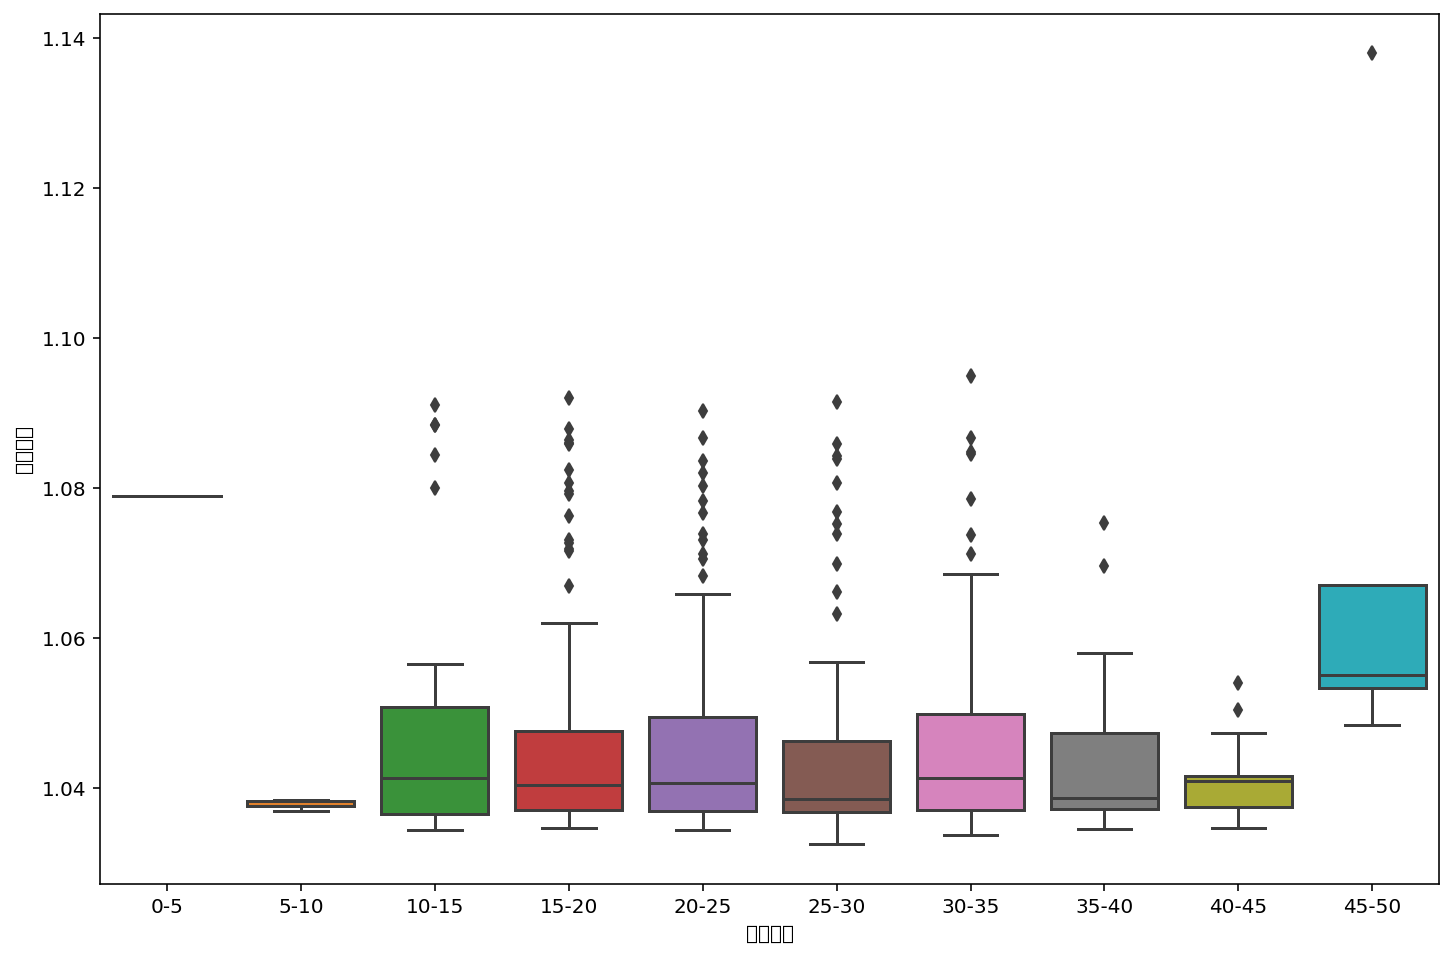

In [63]:
#평수에 따른 매매일반평균가격 증감비율비교
import seaborn as sns

fig,ax=plt.subplots()
#plt.rc('font', family=font_name) 
fig.set_size_inches(12,8)
sns.boxplot(data=NUM_SORT, x='평수기준',y='증감비율')

## 아파트 면적과 매매일반평균가격 증감비율의 상관관계

In [64]:
corr2=NUM_SORT[['아파트면적값','증감비율','브랜드']].corr(method='pearson')
corr2

KeyError: ignored



*   아파트 평수별 가중치 평균을 통해서 매매일반 평균을 구해본 결과 => 결과 발표하고, 증감률의 차이가 큰 것인지 물어보기!!



## (종속변수 상관관계)

In [65]:
corr_SORT=SORT[['아파트세대수','아파트동수','아파트면적값','최근매매실거래가격','최근전세실거래가격','매매하위평균가격','매매일반평균가격','매매상위평균가격','전세하위평균가격','전세일반평균가격','전세상위평균가격']]
corr_SORT=corr_SORT.reset_index(drop=True)

In [66]:
corr=corr_SORT.corr(method='pearson')
corr

,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근전세실거래가격,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격
아파트세대수,1.000000,0.334811,-0.181100,-0.139320,-0.103635,-0.142503,-0.138615,-0.135060,-0.101124,-0.097626,-0.094389
아파트동수,0.334811,1.000000,0.079683,0.086064,0.102109,0.078024,0.081682,0.084886,0.108088,0.111802,0.115057
아파트면적값,-0.181100,0.079683,1.000000,0.665548,0.705909,0.666368,0.667638,0.668327,0.721281,0.718655,0.715676
최근매매실거래가격,-0.139320,0.086064,0.665548,1.000000,0.900644,0.989879,0.990608,0.990601,0.936540,0.939493,0.941357
최근전세실거래가격,-0.103635,0.102109,0.705909,0.900644,1.000000,0.905113,0.906705,0.907521,0.959399,0.959994,0.959716
매매하위평균가격,-0.142503,0.078024,0.666368,0.989879,0.905113,1.000000,0.999606,0.998593,0.943169,0.945575,0.946943
매매일반평균가격,-0.138615,0.081682,0.667638,0.990608,0.906705,0.999606,1.000000,0.999688,0.944854,0.947471,0.949025
매매상위평균가격,-0.135060,0.084886,0.668327,0.990601,0.907521,0.998593,0.999688,1.000000,0.945729,0.948530,0.950251
전세하위평균가격,-0.101124,0.108088,0.721281,0.936540,0.959399,0.943169,0.944854,0.945729,1.000000,0.999505,0.998209
전세일반평균가격,-0.097626,0.111802,0.718655,0.939493,0.959994,0.945575,0.947471,0.948530,0.999505,1.000000,0.999597




*   상관 분석: 두 변수간에 어떤 선형적 관계를 갖고 있는지 분석하는 방법
*   상관 관계: 두 변수간의 관계의 정도를 나타내는 것
*   한 변수의 변화에 따른 변수의 변화 정도와 방향을 통해 연관된 정보를 나타낼 뿐, 인과관계를 의미하진 않는다.



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

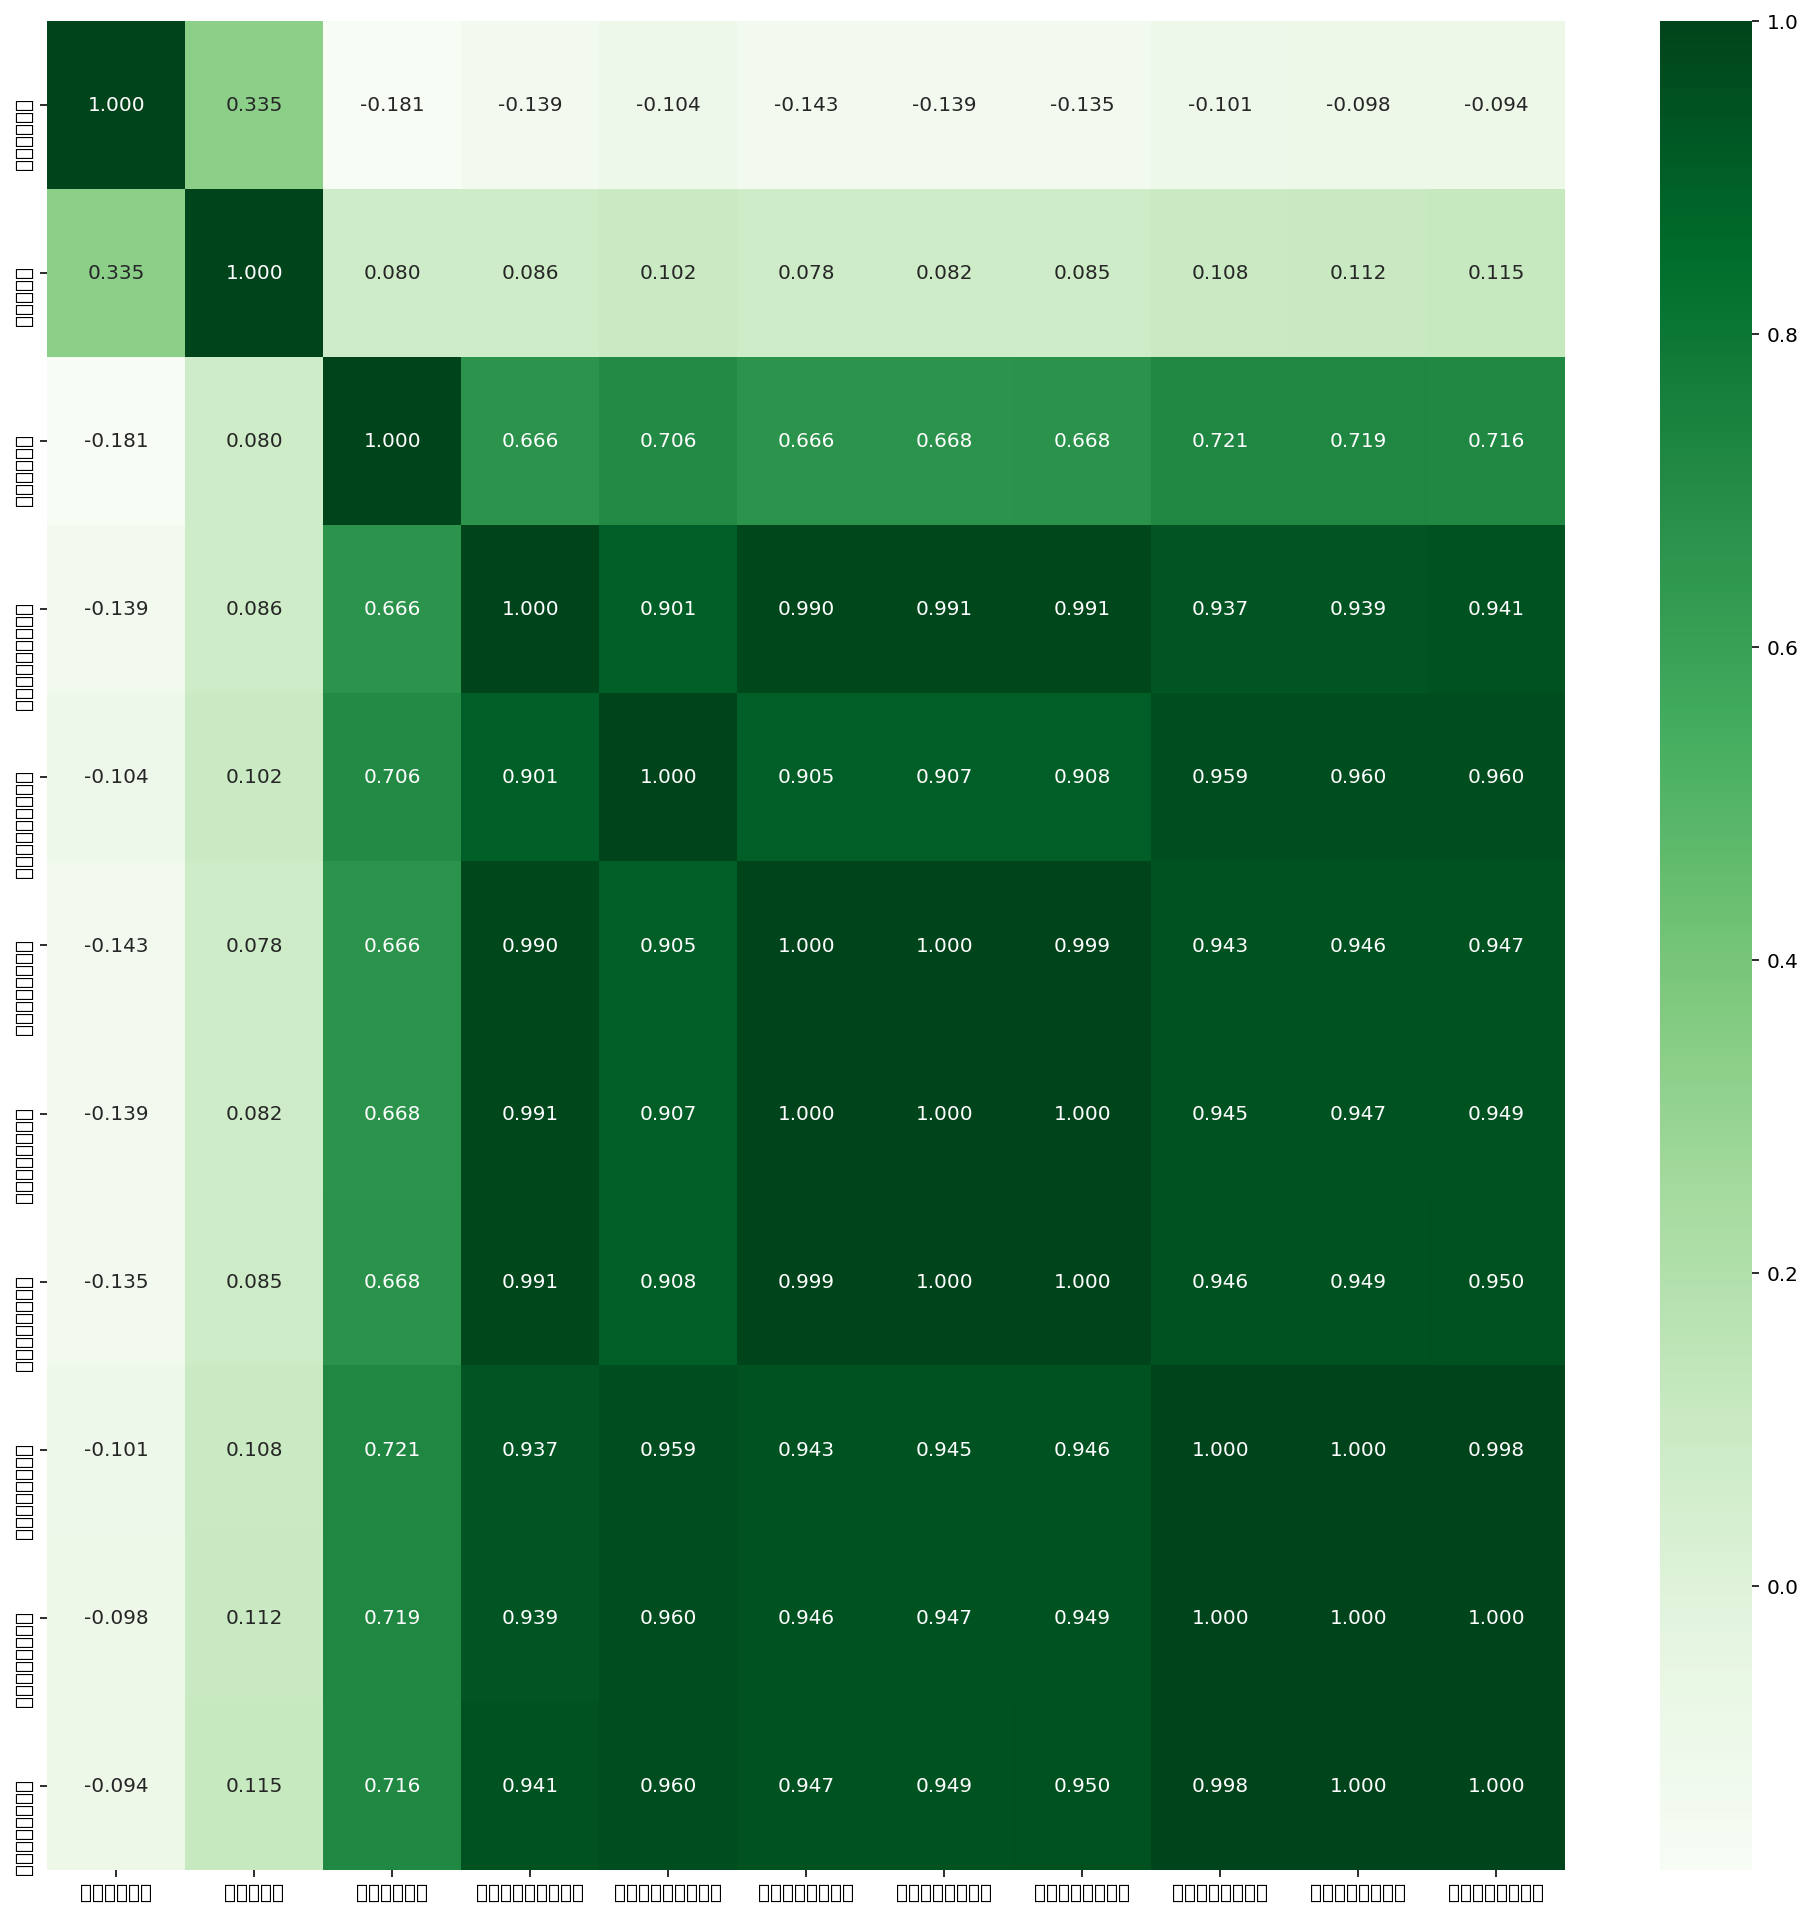

In [67]:
plt.rcParams['figure.figsize']=(17,17)
sns.heatmap(corr, annot=True, fmt='.3f', cmap='Greens')



*   아파트 세대수



### 매매일반 평균
1. 아파트 평수 기준으로 평수 별 가중치 평균 부여
2. 브랜드와 비브랜드의 구분
3. 아파트의 세대수의 'histogram' 분포를 통해서 세대수 파악
4. 교통, 해당 지역의 학군

In [ ]:
#data_num='/content/gdrive/My Drive/인공지능융합프로젝트/기웅/세대수.xlsx'
#data_num=pd.read_excel(data_num)

In [ ]:
#data_num[:2]

In [ ]:
#new_num=data_num[(data_num['매매지역명']=='대구광역시')]
#new_num=new_num.drop(['1년미만거주기간세대수','1년거주기간세대수','2년거주기간세대수','3년거주기간세대수','4년거주기간세대수','5년이상거주기간세대수'],axis=1)

In [ ]:
#new_num=new_num.reset_index(drop=True)

In [ ]:
#new_num[:5]

## 새 섹션

In [68]:
SORT_with_num

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,최근전세실거래가격,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,읍면동,증감비율,거래건수
0,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,11.440550,70000000,20191017,30000000,20191229,78000000,82000000,86000000,40000000,45000000,50000000,20200518,신암동,1.08,17
1,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,94,3,14.988875,105000000,20200311,60000000,20191114,84000000,94500000,105000000,50000000,55000000,60000000,20200518,신암동,1.08,17
2,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,42,1,39.802950,515000000,20191227,360000000,20190823,490000000,517500000,545000000,295000000,315000000,335000000,20200518,황금동,1.10,17
3,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,42,1,44.149875,385000000,20181101,360000000,20190524,550000000,580000000,610000000,345000000,370000000,395000000,20200518,황금동,1.26,17
4,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,21,1,64.919525,680000000,20190823,535000000,20161214,650000000,700000000,750000000,460000000,485000000,510000000,20200518,황금동,1.15,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,202005,대구광역시,42437,희망교대성유니드,대구광역시 남구 희망로5길 12,70,6,37.718725,432000000,20191012,380000000,20191216,410000000,425000000,440000000,280000000,295000000,310000000,20200518,봉덕동,1.05,17
2373,202005,대구광역시,42437,희망교대성유니드,대구광역시 남구 희망로5길 12,37,6,42.168500,525000000,20191130,385000000,20191128,470000000,495000000,520000000,320000000,340000000,360000000,20200518,봉덕동,1.00,8
2374,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,155,8,18.140925,550000000,20200131,340000000,20200512,540000000,570000000,600000000,345000000,362500000,380000000,20200518,황금동,1.14,17
2375,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,316,8,25.685275,700000000,20200221,420000000,20200513,735000000,785000000,835000000,400000000,430000000,460000000,20200518,황금동,1.00,17


In [71]:
from scipy.stats import skew, kurtosis
skew(SORT_with_num['증감비율'])

3.95916164217206

In [72]:
kurtosis(SORT_with_num['증감비율'], fisher=True)

38.573667761782296

In [76]:
from scipy.stats import shapiro
data=SORT_with_num['증감비율']
shapiro(data)

(0.736228883266449, 0.0)

In [87]:
SORT_with_num['증감비율'].groupby(SORT_with_num['읍면동']).mean()

읍면동
가천동    0.983333
각산동    0.988000
감삼동    1.061667
검단동    1.008750
검사동    1.022000
         ...   
평리동    1.104000
학정동    0.981429
호산동    1.015000
황금동    1.043333
효목동    1.045556
Name: 증감비율, Length: 98, dtype: float64

In [92]:
Practice_df=SORT_with_num.groupby(['읍면동']).mean()



*   1(m^2) = 약 0.3025평
*   (column) 아파트면적값 => 평수로 계산하기 위해서 0.3025를 곱해주었기 때문에, 준기와 아파트 면적값이 다름


In [97]:
Practice_df=Practice_df[['아파트면적값','매매일반평균가격','증감비율']]

In [99]:
#동별로 합친 최종 증감비율 DataFrame
Practice_df

,아파트면적값,매매일반평균가격,증감비율
읍면동,,,
가천동,30.072533,4.295833e+08,0.983333
각산동,24.715546,2.772429e+08,0.988000
감삼동,26.826540,4.061667e+08,1.061667
검단동,20.583045,2.022188e+08,1.008750
검사동,22.185048,2.655000e+08,1.022000
...,...,...,...
평리동,24.104712,2.826000e+08,1.104000
학정동,25.237575,3.264286e+08,0.981429
호산동,28.868331,2.816250e+08,1.015000


# 거래내역 데이터

**[ 업종 대분류 ]**


*   상권정보업종코드집 - 소상공인 상권분석
*   위의 업종중대분류를 이용하여 해당 데이터의 [업종 대분류] 컬럼 생성



In [104]:
data_1904='/content/gdrive/My Drive/인공지능융합프로젝트/bc_card/201904.xlsx'
data_1905='/content/gdrive/My Drive/인공지능융합프로젝트/bc_card/201905.xlsx'
data_2004='/content/gdrive/My Drive/인공지능융합프로젝트/bc_card/202004.xlsx'
data_2005='/content/gdrive/My Drive/인공지능융합프로젝트/bc_card/202005.xlsx'

In [105]:
import pandas as pd
data_1904=pd.read_excel(data_1904)
data_1905=pd.read_excel(data_1905)
data_2004=pd.read_excel(data_2004)
data_2005=pd.read_excel(data_2005)

In [107]:
sales_data=pd.concat([data_1904, data_1905, data_2004, data_2005], ignore_index=True)

In [222]:
sales_data

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액
0,20190401,6654,14688,1995,25,M,5,9998,NaN,128180
1,20190401,6654,14688,1998,20,F,5,9998,NaN,14620
2,20190401,6654,14697,1999,20,M,5,9998,NaN,32000
3,20190401,6654,14699,1960,60,F,5,9998,NaN,17588
4,20190401,6654,14699,1990,30,F,5,9998,NaN,41463
...,...,...,...,...,...,...,...,...,...,...
4194295,20200522,15015,15015,1988,30,M,5,4010,0.0,8573
4194296,20200522,39196,39196,1960,60,F,9,4020,0.0,13150
4194297,20200522,48106,48109,1968,50,F,5,4004,0.0,39285
4194298,20200522,37558,37558,1968,50,F,9,4020,0.0,12743


In [138]:
zip=zip.reset_index(drop=True)

In [139]:
zip

,우편번호,읍면동
0,42424,대명동
1,42426,대명동
2,42425,대명동
3,42428,대명동
4,42416,대명동
...,...,...
1488,41940,삼덕동2가
1489,41948,삼덕동2가
1490,41920,서성로1가
1491,41902,태평로2가


In [195]:
code='/content/gdrive/My Drive/인공지능융합프로젝트/bc_card/업종코드.xlsx'
code=pd.read_excel(code)

In [309]:
#가맹점신우편번호와 우편번호 데이터프레임 교집합
Practice_df2=pd.merge(sales_data, zip, left_on='가맹점신우편번호', right_on='우편번호')
Practice_df2=Practice_df2.dropna()

In [310]:
Practice_df2=Practice_df2.reset_index(drop=True)

In [311]:
Practice_df2

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액,우편번호,읍면동
0,20200401,42628,41599,1961,60,F,9,4020,0.0,14677,42628,용산동
1,20200401,42628,42625,1997,20,M,9,8006,0.0,4733,42628,용산동
2,20200401,42628,42630,1995,25,M,9,4010,0.0,4500,42628,용산동
3,20200401,42628,42630,1970,50,F,9,8301,0.0,8388,42628,용산동
4,20200401,42628,41599,1977,40,F,5,4020,0.0,14593,42628,용산동
...,...,...,...,...,...,...,...,...,...,...,...,...
51068,20200521,41971,41971,1987,30,F,9,5123,0.0,390333,41971,남산동
51069,20200521,42000,42000,1976,45,M,9,4020,0.0,16267,42000,범어동
51070,20200521,43010,43008,1992,25,F,9,5123,0.0,470333,43010,구지면
51071,20200521,41107,41109,1987,30,M,9,4020,0.0,8567,41107,율하동




*   sales_data >> 2019년 04, 2019년 05, 2020년 04, 2020년 05
*   zip >> 대구광역시의 우편번호
*   sales_data와 zip을 합치면 2020년 04, 2020년 05 데이터만 남는다. → zip 코드 데이터에 대한 문제 때문인 거 같은데, 추후에 수정해보기!



In [313]:
months=[]
for i in range(Practice_df2.shape[0]):
  row=Practice_df2.iloc[i]
  data=row['기준일자']
  
  #해당 기준일자가 19년인지, 20년인지 모르므로 month1과 month2를 구한다.
  #month1과 month2중 양수인 것을 해당 기준일자의 '월'로 선택한다.
  
  month1=(data-20200000)//100
  month2=(data-20190000)//100
  if month1 > 0:
    months.append(month1)
    continue
  elif month2 > 0:
    months.append(month2)
    continue

In [314]:
len(months)

51073

In [315]:
Practice_df2['기준일자(월)']=months

In [316]:
Practice_df2

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액,우편번호,읍면동,기준일자(월)
0,20200401,42628,41599,1961,60,F,9,4020,0.0,14677,42628,용산동,4
1,20200401,42628,42625,1997,20,M,9,8006,0.0,4733,42628,용산동,4
2,20200401,42628,42630,1995,25,M,9,4010,0.0,4500,42628,용산동,4
3,20200401,42628,42630,1970,50,F,9,8301,0.0,8388,42628,용산동,4
4,20200401,42628,41599,1977,40,F,5,4020,0.0,14593,42628,용산동,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51068,20200521,41971,41971,1987,30,F,9,5123,0.0,390333,41971,남산동,5
51069,20200521,42000,42000,1976,45,M,9,4020,0.0,16267,42000,범어동,5
51070,20200521,43010,43008,1992,25,F,9,5123,0.0,470333,43010,구지면,5
51071,20200521,41107,41109,1987,30,M,9,4020,0.0,8567,41107,율하동,5


In [317]:
#Practice_df2.to_excel('/content/gdrive/My Drive/인공지능융합프로젝트/Practice_df2(2).xlsx')

In [ ]:
#(20200414-20200000)//100
#(20200414-20200000)%100

In [318]:
Practice_test=Practice_df2.groupby(['읍면동','기준일자(월)'])['매출금액'].sum()
Practice_test=pd.DataFrame(Practice_test)

In [319]:
Practice_test

매출금액
읍면동 기준일자(월)         
가창면 4        49030  
    5        142113 
가천동 4        56162  
    5        128507 
각산동 4        2067244
...             ... 
화원읍 5        7344738
황금동 4        1381809
    5        826875 
효목동 4        1459645
    5        1146208

[240 rows x 1 columns]

In [320]:
Practice_test.reset_index(inplace=True)

In [321]:
Practice_test

,읍면동,기준일자(월),매출금액
0,가창면,4,49030
1,가창면,5,142113
2,가천동,4,56162
3,가천동,5,128507
4,각산동,4,2067244
...,...,...,...
235,화원읍,5,7344738
236,황금동,4,1381809
237,황금동,5,826875
238,효목동,4,1459645


In [322]:
#Practice_test.to_excel('/content/gdrive/My Drive/인공지능융합프로젝트/practice_test(2).xlsx')

In [323]:
dong_unique=Practice_test['읍면동'].unique()
costs=[]

for i in range(len(dong_unique)):
  dong=dong_unique[i]
  cost=0
  for ind in range(Practice_test.shape[0]):
    row=Practice_test.iloc[ind]
    row_dong=row['읍면동']
    row_cost=row['매출금액']
    if dong == row_dong:
      cost += row_cost
  costs.append(cost)

In [324]:
print(len(dong_unique))
print(len(costs))

125
125


In [326]:
Practice_test2=pd.DataFrame(columns=['읍면동','매출금액총합'])

In [327]:
Practice_test2['읍면동']=dong_unique
Practice_test2['매출금액총합']=costs

In [328]:
Practice_test2

,읍면동,매출금액총합
0,가창면,191143
1,가천동,184669
2,각산동,3955449
3,갈산동,55850
4,감삼동,12861271
...,...,...
120,호림동,169700
121,호산동,5406831
122,화원읍,18121299
123,황금동,2208684


In [ ]:
#일요일에 해볼 것
#Practice_test2기준
#1. 해당 row가 19년인지 20년인지 확인
#2. 1번 결과에 따라서 매출금액의 증감률을 어떻게 계산할지 고려해보기
#3. 증감률을 계산하고, 만약 증감률을 비교할 데이터가 없으면 row에서 삭제하기
#4. 아래의 최종 결과를 통해서 업종코드 대분류를 어떻게 하면 좋을지 생각해보기

**심슨의 역설(Simpson Paradox)**


*   처음 직관적으로 살펴본 결과에 반대되는 역설적인 상황이 발생하는 것을 의미한다.
*   혼재변수(confounding variable of hidden variable)라는 숨겨진 변수가 누락된 상태에서 데이터가 통합되어, 원래 결과와 전혀 다른 의미를 도출하는 오류를 범하게 된다.
*   심슨의 역설을 피하기 위해서는 데이터를 전반적으로 이해하고, 변수에 영향을 주는 모든 요인들을 고려해야 한다.



In [200]:
test=Practice_df2['가맹점업종코드'].unique()
len(test)

48

In [201]:
test=pd.DataFrame(test)
test=test.rename(columns={0:"업종코드"})
test[:10]

,업종코드
0,4020
1,8006
2,4010
3,8301
4,2199
5,8310
6,8302
7,7041
8,8021
9,8013


In [202]:
code

,업종코드,업종명
0,3302,L P G
1,1002,1급 호텔
2,1001,특급 호텔
3,1003,2급 호텔
4,1010,콘도
...,...,...
341,9993,외국인전용가맹점
342,9995,비씨카드정산용
343,9996,비씨카드정산용(할인)
344,9998,기타전문점


In [203]:
#가맹점신우편번호를 기준으로 '읍면동'을 확인했을 때 남겨지는 48개의 업종코드와 그에대한 업종대분류 merge
test=pd.merge(test, code, on=None)

In [205]:
test

,업종코드,업종명
0,4020,슈퍼 마켓
1,8006,서양음식
2,4010,편 의 점
3,8301,제 과 점
4,2199,기타레져업
5,8310,농축수산품
6,8302,정 육 점
7,7041,약국
8,8021,스넥
9,8013,주점


In [206]:
#test.to_excel('/content/gdrive/My Drive/인공지능융합프로젝트/code.xlsx')